C:\Users\congv\AppData\Local\Temp\ipykernel_23252\584282312.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_value[-1] = next_day_prediction
C:\Users\congv\AppData\Local\Temp\ipykernel_23252\584282312.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_value[-1] = next_day_prediction
C:\Users\congv\AppData\Local\Temp\ipykernel_23252\584282312.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_value[-1] = next_day_prediction
C:\Users\congv\AppD



BTC

Test RMSE: 1659.2753082419363, MAPE: 2.0349038368159467, MASE: 1.9901180030914751



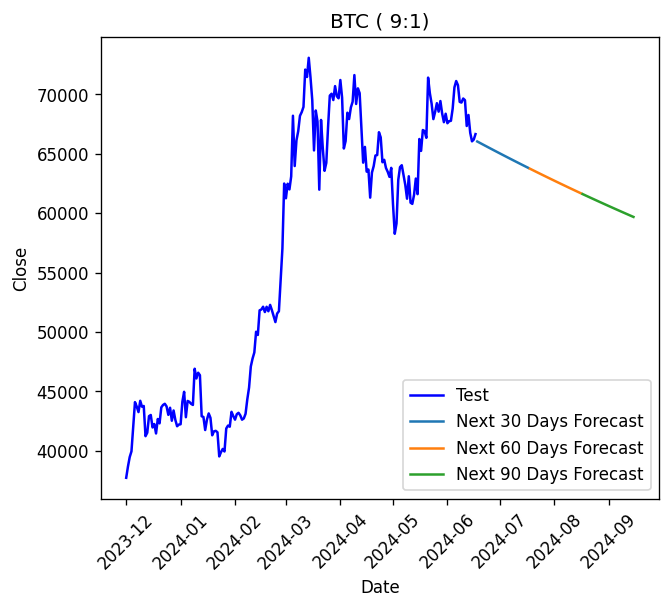

C:\Users\congv\AppData\Local\Temp\ipykernel_23252\584282312.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_value[-1] = next_day_prediction
C:\Users\congv\AppData\Local\Temp\ipykernel_23252\584282312.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_value[-1] = next_day_prediction
C:\Users\congv\AppData\Local\Temp\ipykernel_23252\584282312.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_value[-1] = next_day_prediction
C:\Users\congv\AppD



DOGE

Test RMSE: 99.38251300596166, MAPE: 2.2291318538842493, MASE: 1.5639087019574984



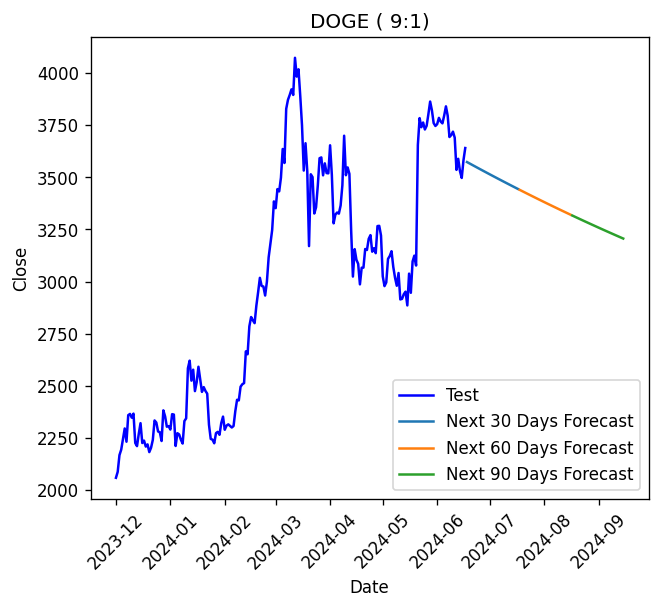

C:\Users\congv\AppData\Local\Temp\ipykernel_23252\584282312.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_value[-1] = next_day_prediction
C:\Users\congv\AppData\Local\Temp\ipykernel_23252\584282312.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_value[-1] = next_day_prediction
C:\Users\congv\AppData\Local\Temp\ipykernel_23252\584282312.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_value[-1] = next_day_prediction
C:\Users\congv\AppD



ETH

Test RMSE: 0.007801011187413164, MAPE: 3.6641180265151014, MASE: 1.348501850399215



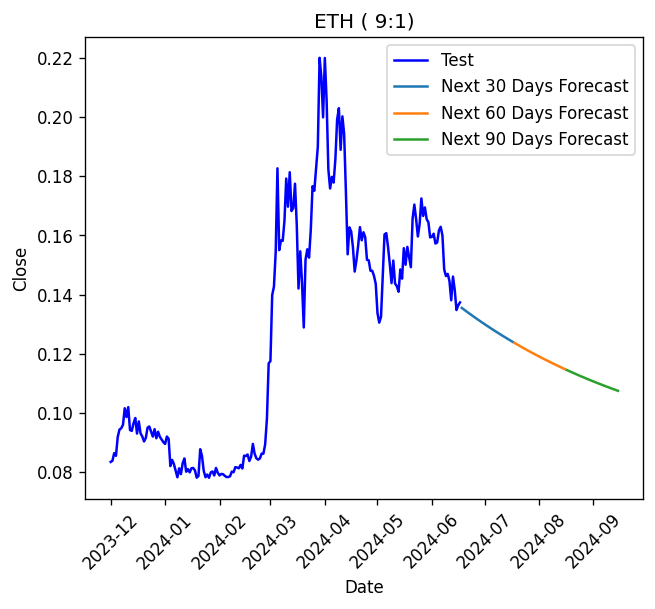

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import random
import math
import os

datasets = ['BTC.csv', 'DOGE.csv', 'ETH.csv']
index_col = 'Date'
attribute = 'Close'
train_ratio = 0.9


# Hàm để đặt seed
def set_seed(seed):
    np.random.seed(seed)
    random.seed(seed)

# Hàm tính các chỉ số đánh giá dự báo
def evaluate_forecast(true_values, predicted_values, historical_data):
    rmse = np.sqrt(np.mean((true_values - predicted_values) ** 2))
    mape = np.mean(np.abs((true_values - predicted_values) / true_values)) * 100

    # Tính toán MASE
    mae = np.mean(np.abs(true_values - predicted_values))
    mase = mae / np.mean(np.abs(np.diff(historical_data)))
    return rmse, mape, mase

# Hàm để đọc dữ liệu từ các tệp CSV và chuẩn bị dữ liệu
def load_and_process_data(dataset, index_col, attribute, train_ratio):
    data = pd.read_csv(dataset, index_col=index_col)
    data.index = pd.to_datetime(data.index, format='%Y-%m-%d').to_period('D')
    data.dropna(inplace=True)

    # Điền các giá trị ngày thiếu
    full_date_range = pd.date_range(start=data.index[0].to_timestamp(), end=data.index[-1].to_timestamp(), freq='D')
    data = data.reindex(full_date_range.to_period('D'), method='ffill')

    # Chuẩn hóa dữ liệu
    target = data[attribute].values
    train_size = int(len(target) * train_ratio)

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(target.reshape(-1, 1))
    train_data = scaled_data[0:train_size, :]

    return data, target, train_data, train_size, scaler, scaled_data  # Return target along with other variables

# Hàm để huấn luyện mô hình hồi quy tuyến tính
def train_linear_regression_model(x_train, y_train):
    model = LinearRegression()
    model.fit(x_train, y_train)
    return model

# Hàm để chuẩn bị dữ liệu và dự báo
def prepare_and_predict(model, x_test, scaler, y_test, scaled_data):
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()

    # Mở rộng x_test cho dự báo trong tương lai
    x_test_extended = np.copy(x_test)
    last_value = x_test[-1]

    for _ in range(90):
        next_day_prediction = model.predict(last_value.reshape(1, -1))
        last_value = np.roll(last_value, -1)
        last_value[-1] = next_day_prediction
        x_test_extended = np.append(x_test_extended, last_value.reshape(1, -1), axis=0)

    predictions_extended = model.predict(x_test_extended)
    predictions_extended = scaler.inverse_transform(predictions_extended.reshape(-1, 1)).flatten()

    # Lấy dự báo cho 30, 60, 90 ngày tiếp theo
    next_30_days = predictions_extended[len(predictions):len(predictions)+30]
    next_60_days = predictions_extended[len(predictions)+30:len(predictions)+60]
    next_90_days = predictions_extended[len(predictions)+60:len(predictions)+90]

    return predictions, next_30_days, next_60_days, next_90_days

# Hàm để đánh giá và xuất dự báo cho từng tập dữ liệu
def evaluate_datasets(datasets, index_col, attribute, train_ratio):
    for dataset in datasets:
        set_seed(42)
        data, target, train_data, train_size, scaler, scaled_data = load_and_process_data(dataset, index_col, attribute, train_ratio)

        x_train = []
        y_train = []

        for i in range(1, len(train_data)):
            x_train.append(train_data[i-1:i, 0])
            y_train.append(train_data[i, 0])

        x_train, y_train = np.array(x_train), np.array(y_train)
        x_train = x_train.reshape(-1, 1)

        model = train_linear_regression_model(x_train, y_train)

        test_data = scaled_data[train_size-1:, :]
        x_test = test_data[:-1]
        y_test = target[train_size:]

        x_test = x_test.reshape(-1, 1)

        predictions, next_30_days, next_60_days, next_90_days = prepare_and_predict(model, x_test, scaler, y_test, scaled_data)
         # Evaluate forecast
        rmse, mape, mase = evaluate_forecast(y_test, predictions, target[:train_size])

          # Print evaluation results
        print(f"\n\n{dataset.split('.')[0]}\n")
        print(f"Test RMSE: {rmse}, MAPE: {mape}, MASE: {mase}\n")

        # Vẽ biểu đồ
        plt.figure(dpi=120, figsize=(6, 5))
        plt.xlabel(index_col)
        plt.ylabel(attribute)
        plt.plot(data.index.to_timestamp()[train_size:], target[train_size:], color='blue',label='Test')

        last_test_date = data.index[-1].to_timestamp()
        next_dates_forecast = pd.date_range(start=last_test_date, periods=90 + 1, freq='D')[1:]

        plt.plot(next_dates_forecast[:30], next_30_days, label='Next 30 Days Forecast')
        plt.plot(next_dates_forecast[30:60], next_60_days, label='Next 60 Days Forecast')
        plt.plot(next_dates_forecast[60:], next_90_days, label='Next 90 Days Forecast')

        plt.legend()
        plt.title(f'{dataset.split(".")[0]} ( {int(train_ratio*10)}:{math.floor((10 - train_ratio*10))})')
        plt.xticks(rotation=45)

         # Lưu biểu đồ vào thư mục
        output_dir = 'charts'
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        output_file = os.path.join(output_dir, f'{dataset.split(".")[0]}_9_1.png')
        plt.savefig(output_file)

        # Hiển thị biểu đồ trực tiếp
        plt.show()
evaluate_datasets(datasets, index_col, attribute, train_ratio)


